In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/Users/yasaswi/Documents/marlabs/training/MY_PRACTICE/Advertising.csv")

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [8]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features=polynomial_converter.fit_transform(X)

In [11]:
X.shape


(200, 4)

In [12]:
X.iloc[0]

Unnamed: 0      1.0
TV            230.1
Radio          37.8
Newspaper      69.2
Name: 0, dtype: float64

In [13]:
poly_features[0]

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values for plotting a sine function
time_values = np.linspace(0, 10, 101)
print(time_values)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


In [15]:
# use linear regression with poly_features intead of X. So, we can get better results
#I need to do this

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

In [17]:
model=LinearRegression()
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [18]:
model.coef_
# 

array([-1.91076696e-03,  5.23044584e-02,  8.43025303e-03,  1.68853194e-02,
        3.50130187e-07,  3.59602674e-06,  5.09042276e-05, -9.52616131e-06,
       -1.12742977e-04,  1.12882446e-03, -5.41627576e-05,  8.13106861e-05,
        7.53924431e-05, -4.02436645e-05])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print(MAE, MSE, RMSE)

0.49602803737471207 0.43120924322276016 0.6566652444151131


In [43]:
# training error fro degree
train_rmse_error = []
# test error per degree
test_rmse_error = []
for d in range(1,10):

    # create poly dataset for degree "d"
    polynomial_converter = PolynomialFeatures(degree = d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    #split the new poly set
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)
    model = LinearRegression()
    model.fit(X_train, y_train)

    #predict on both train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    #calculate errors
    #error on trained set
    train_rmse = np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)
print(train_rmse_error)
print(test_rmse_error)

[1.7202337240124603, 0.6120641714001529, 0.4300987063547286, 0.32493739953019896, 0.16205929910126557, 1.2088392673919076e-07, 1.9704858374081554e-08, 4.831239913595738e-08, 1.9915552762154267e-05]
[1.4553247083273964, 0.5940951368760364, 0.5756360611704764, 0.49425007255835846, 1.1167286250052708, 53.459589543525986, 445.5214341339908, 1901.548845087234, 13365.758734755917]


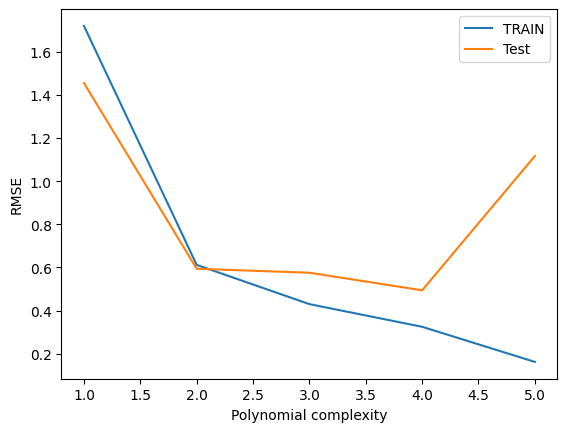

In [44]:
plt.plot(range(1,6), train_rmse_error[:5], label="TRAIN")
plt.plot(range(1,6), test_rmse_error[:5], label="Test")
plt.ylabel("RMSE")
plt.xlabel("Polynomial complexity")
plt.legend()

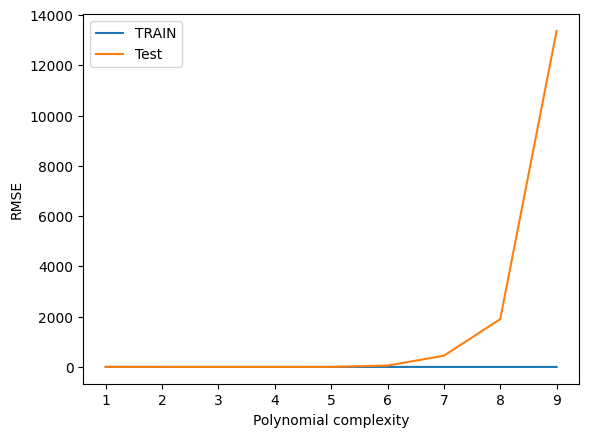

In [51]:
plt.plot(range(1,10), train_rmse_error[:10], label="TRAIN")
plt.plot(range(1,10), test_rmse_error[:10], label="Test")
plt.ylabel("RMSE")
plt.xlabel("Polynomial complexity")
plt.legend()

In [63]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_feat = final_poly_converter.fit_transform(X[])
print(poly_feat.shape)
#split the new poly set
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.33, random_state=101)
final_model = LinearRegression()
final_model.fit(X_train, y_train)

#predict on both train and test data
# test_predictions = model.predict(X_test)

(200, 34)


LinearRegression()

In [58]:
from joblib import dump, load
dump(final_model,'final_poly_model.joblib')
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [59]:
loaded_model  = load('final_poly_model.joblib')
loaded_converter = load('final_converter.joblib')

In [80]:
campaining = [[0,149,22,12]]


In [81]:
transformedData = loaded_converter.fit_transform(campaining)
print(transformedData.shape)
loaded_model.predict(transformedData)

(1, 34)


array([14.57852537])

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2
